# Insurance Claims Fraud Detection

Fraud is one of the largest and most well known problems that insurer face.This article focusses on claim data of a car insurance company. This dataset includes claims for a car insurance company in the United States. The data consists of 1000 individual claims. This dataset consists of both numeric and categorical data.
In this dataset Fraud Reported is the targeted column. Insurance Fraud Detection is calculated with the help of various factors which is given in dataset.

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [101]:
df = pd.read_csv('automobile_insurance_fraud.csv')
pd.options.display.max_columns=None

In [102]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,craft-repair,paintball,unmarried,0,0,22-02-2015,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,6045 Andromedia St,20,1,YES,0,1,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,prof-specialty,sleeping,wife,70900,0,24-01-2015,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,3092 Texas Drive,23,1,YES,2,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,35100,0,23-01-2015,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,7629 5th St,4,3,?,2,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,handlers-cleaners,base-jumping,wife,0,0,26-02-2015,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,6128 Elm Lane,2,1,?,0,1,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [103]:
df.shape

(1000, 40)

In [104]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

### About the Columns

months_as_customer - This column shows that from how long the customer doing business with company.

age - Age of customer.

policy_number - Policy number of customer.

policy_state - 

policy_deductable

policy_annual_premium

umbrella_limit

insured_zip

insured_sex - This column shows the gender of customer.

insured_occupation - This column shows from which occupation the customer is.

capital-gains

capital-loss

incident_date - Date of an incident.

incident_type - This column shows that which type of incident is happen. 

incident_severity - This column shows which type severity is.

incident_city - In which city the incident happen

number_of_vehicles_involved - How many vehicles are involved in accident.

property_damage - Property get damaged or not.

bodily_injuries - Injuries on body.

witnesses - how many witnesses are present on accident site.

police_report_available - Police report of an accident is available or not.

total_claim_amount - Total amount to claim  for an insurance.

fraud_reported - Given report is fraud or not.

In [105]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [107]:
df.drop(['_c39'],axis=1,inplace=True)

##### We drop the  _39 column because it has all the nan values.

In [108]:
l = ['policy_bind_date','policy_csl','insured_hobbies','insured_relationship',
    'incident_date','incident_state','incident_location','incident_hour_of_the_day',
    'injury_claim','property_claim','vehicle_claim','auto_model']
df.drop(l,axis=1,inplace=True)

##### We drop these column because they has not much effect on dataset.

### Finding the Misssing Values

In [109]:
sum(df['umbrella_limit']==0)

798

In [110]:
sum(df['capital-gains']==0)

508

In [111]:
sum(df['capital-loss']==0)

475

In [112]:
df['collision_type'].unique()

array(['Side Collision', '?', 'Rear Collision', 'Front Collision'],
      dtype=object)

In [113]:
df['collision_type'].mode()

0    Rear Collision
dtype: object

In [114]:
df['authorities_contacted'].unique()

array(['Police', 'None', 'Fire', 'Other', 'Ambulance'], dtype=object)

In [115]:
df['authorities_contacted'].mode()

0    Police
dtype: object

In [116]:
df['property_damage'].unique()

array(['YES', '?', 'NO'], dtype=object)

In [117]:
df['property_damage'].mode()

0    ?
dtype: object

In [118]:
df['police_report_available'].unique()

array(['YES', '?', 'NO'], dtype=object)

In [119]:
df['police_report_available'].mode()

0     ?
1    NO
dtype: object

### Filling 0 Values

In [120]:
df['umbrella_limit'].replace(0,df['umbrella_limit'].mean(),inplace=True)

In [121]:
sum(df['umbrella_limit']==0)

0

In [122]:
df['capital-gains'].replace(0,df['capital-gains'].mean(),inplace=True)

In [123]:
sum(df['capital-gains']==0)

0

In [124]:
df['capital-loss'].replace(0,df['capital-loss'].mean(),inplace=True)

In [125]:
sum(df['capital-loss']==0)

0

##### We fill all the zero values in column.

### Filling ? Values

In [126]:
df['collision_type'] = df['collision_type'].replace('?',np.nan)
df['property_damage'] = df['property_damage'].replace('?',np.nan)
df['police_report_available'] = df['police_report_available'].replace('?',np.nan)

In [127]:
df.head(20)

,months_as_customer,age,policy_number,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_city,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,auto_make,auto_year,fraud_reported
0,328,48,521585,OH,1000,1406.91,1101000,466132,MALE,MD,craft-repair,53300.0,-26793.7,Single Vehicle Collision,Side Collision,Major Damage,Police,Columbus,1,YES,1,2,YES,71610,Saab,2004,Y
1,228,42,342868,IN,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,25126.1,-26793.7,Vehicle Theft,NaN,Minor Damage,Police,Riverwood,1,NaN,0,0,NaN,5070,Mercedes,2007,Y
2,134,29,687698,OH,2000,1413.14,5000000,430632,FEMALE,PhD,sales,35100.0,-26793.7,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,Columbus,3,NO,2,3,NO,34650,Dodge,2007,N
3,256,41,227811,IL,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,48900.0,-62400.0,Single Vehicle Collision,Front Collision,Major Damage,Police,Arlington,1,NaN,1,2,NO,63400,Chevrolet,2014,Y
4,228,44,367455,IL,1000,1583.91,6000000,610706,MALE,Associate,sales,66000.0,-46000.0,Vehicle Theft,NaN,Minor Damage,None,Arlington,1,NO,0,1,NO,6500,Accura,2009,N
5,256,39,104594,OH,1000,1351.10,1101000,478456,FEMALE,PhD,tech-support,25126.1,-26793.7,Multi-vehicle Collision,Rear Collision,Major Damage,Fire,Arlington,3,NO,0,2,NO,64100,Saab,2003,Y
6,137,34,413978,IN,1000,1333.35,1101000,441716,MALE,PhD,prof-specialty,25126.1,-77000.0,Multi-vehicle Collision,Front Collision,Minor Damage,Police,Springfield,3,NaN,0,0,NaN,78650,Nissan,2012,N
7,165,37,429027,IL,1000,1137.03,1101000,603195,MALE,Associate,tech-support,25126.1,-26793.7,Multi-vehicle Collision,Front Collision,Total Loss,Police,Columbus,3,NaN,2,2,YES,51590,Audi,2015,N
8,27,33,485665,IL,500,1442.99,1101000,601734,FEMALE,PhD,other-service,25126.1,-26793.7,Single Vehicle Collision,Front Collision,Total Loss,Police,Arlington,1,NO,1,1,YES,27700,Toyota,2012,N
9,212,42,636550,IL,500,1315.68,1101000,600983,MALE,PhD,priv-house-serv,25126.1,-39300.0,Single Vehicle Collision,Rear Collision,Total Loss,Other,Hillsdale,1,NO,2,1,NaN,42300,Saab,1996,N


##### We replace all the ? values with NaN, now we have to fill NaN values.

### Filling NaN Values

In [128]:
df['collision_type'].fillna(df['collision_type'].mode()[0],inplace=True)
df['property_damage'].fillna(df['property_damage'].mode()[0],inplace=True)
df['police_report_available'].fillna(df['police_report_available'].mode()[0],inplace=True)

In [129]:
df.head(30)

,months_as_customer,age,policy_number,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_city,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,auto_make,auto_year,fraud_reported
0,328,48,521585,OH,1000,1406.91,1101000,466132,MALE,MD,craft-repair,53300.0,-26793.7,Single Vehicle Collision,Side Collision,Major Damage,Police,Columbus,1,YES,1,2,YES,71610,Saab,2004,Y
1,228,42,342868,IN,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,25126.1,-26793.7,Vehicle Theft,Rear Collision,Minor Damage,Police,Riverwood,1,NO,0,0,NO,5070,Mercedes,2007,Y
2,134,29,687698,OH,2000,1413.14,5000000,430632,FEMALE,PhD,sales,35100.0,-26793.7,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,Columbus,3,NO,2,3,NO,34650,Dodge,2007,N
3,256,41,227811,IL,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,48900.0,-62400.0,Single Vehicle Collision,Front Collision,Major Damage,Police,Arlington,1,NO,1,2,NO,63400,Chevrolet,2014,Y
4,228,44,367455,IL,1000,1583.91,6000000,610706,MALE,Associate,sales,66000.0,-46000.0,Vehicle Theft,Rear Collision,Minor Damage,None,Arlington,1,NO,0,1,NO,6500,Accura,2009,N
5,256,39,104594,OH,1000,1351.10,1101000,478456,FEMALE,PhD,tech-support,25126.1,-26793.7,Multi-vehicle Collision,Rear Collision,Major Damage,Fire,Arlington,3,NO,0,2,NO,64100,Saab,2003,Y
6,137,34,413978,IN,1000,1333.35,1101000,441716,MALE,PhD,prof-specialty,25126.1,-77000.0,Multi-vehicle Collision,Front Collision,Minor Damage,Police,Springfield,3,NO,0,0,NO,78650,Nissan,2012,N
7,165,37,429027,IL,1000,1137.03,1101000,603195,MALE,Associate,tech-support,25126.1,-26793.7,Multi-vehicle Collision,Front Collision,Total Loss,Police,Columbus,3,NO,2,2,YES,51590,Audi,2015,N
8,27,33,485665,IL,500,1442.99,1101000,601734,FEMALE,PhD,other-service,25126.1,-26793.7,Single Vehicle Collision,Front Collision,Total Loss,Police,Arlington,1,NO,1,1,YES,27700,Toyota,2012,N
9,212,42,636550,IL,500,1315.68,1101000,600983,MALE,PhD,priv-house-serv,25126.1,-39300.0,Single Vehicle Collision,Rear Collision,Total Loss,Other,Hillsdale,1,NO,2,1,NO,42300,Saab,1996,N


In [130]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_state                   0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
capital-gains                  0
capital-loss                   0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_city                  0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
auto_make                      0
auto_year                      0
fraud_reported                 0
dtype: int64

##### Now we dont have any null values in dataset.

### Data Analysis and Visualization

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

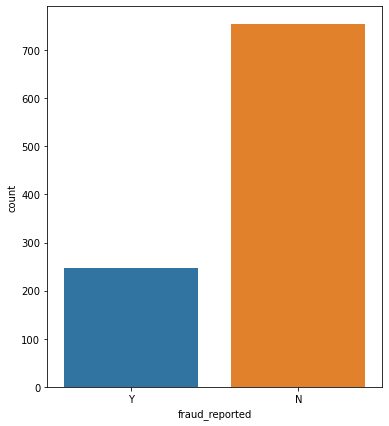

In [131]:
plt.figure(figsize=(6,7))
sns.countplot(x = 'fraud_reported',data=df)

##### Number of fraud report is less than the non fraud report.

<AxesSubplot:xlabel='insured_sex', ylabel='count'>

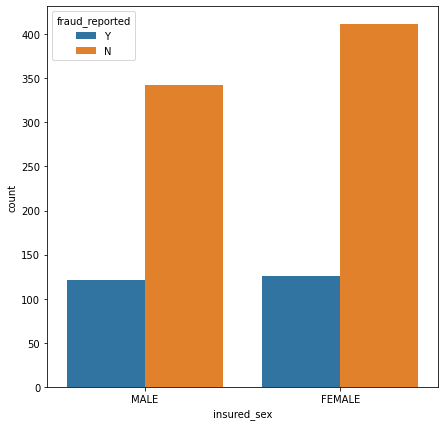

In [132]:
plt.figure(figsize=(7,7))
sns.countplot(x = 'insured_sex',hue='fraud_reported',data=df)

##### Number of female customer who claims for the insurance is more than the male,but the number of Fraud report for insurance of male and female is almost same. 

<AxesSubplot:xlabel='insured_education_level', ylabel='count'>

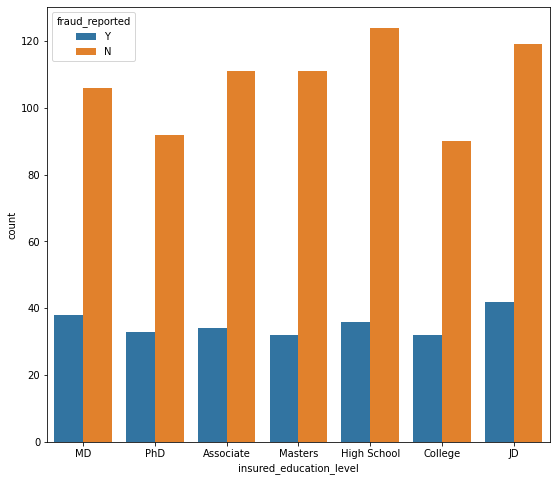

In [133]:
plt.figure(figsize=(9,8))
sns.countplot(x = 'insured_education_level',hue='fraud_reported',data=df)

##### From above plot we can see that, the number of people who are high school educated are claim for the insurance more than others. The number of fraud report registered more is by the MD and JD educated people.

<AxesSubplot:xlabel='incident_type', ylabel='count'>

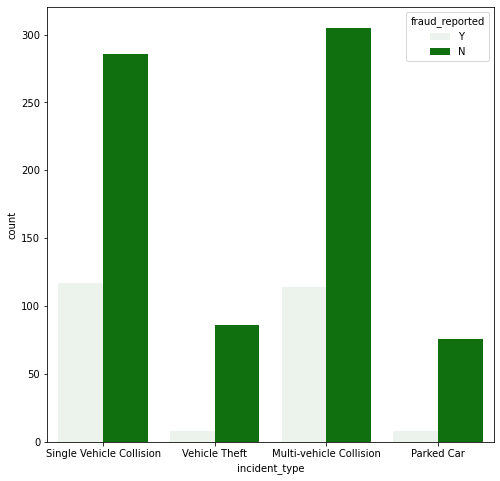

In [134]:
plt.figure(figsize=(8,8))
sns.countplot(x = 'incident_type',hue='fraud_reported',data=df,color='g')

##### From above plot we can say that, the number of fraud report is registered by Single vehicle Collision is more than others.

<AxesSubplot:xlabel='authorities_contacted', ylabel='count'>

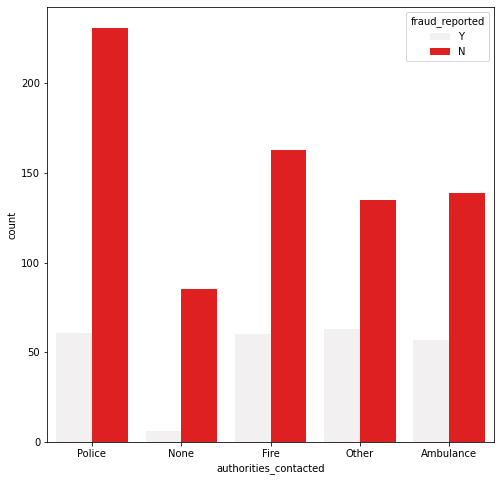

In [135]:
plt.figure(figsize=(8,8))
sns.countplot(x = 'authorities_contacted',hue='fraud_reported',data=df,color='r')

##### From above plot we can say that after the incident most called authorities are ; police,Fire and others.

<AxesSubplot:xlabel='incident_city', ylabel='count'>

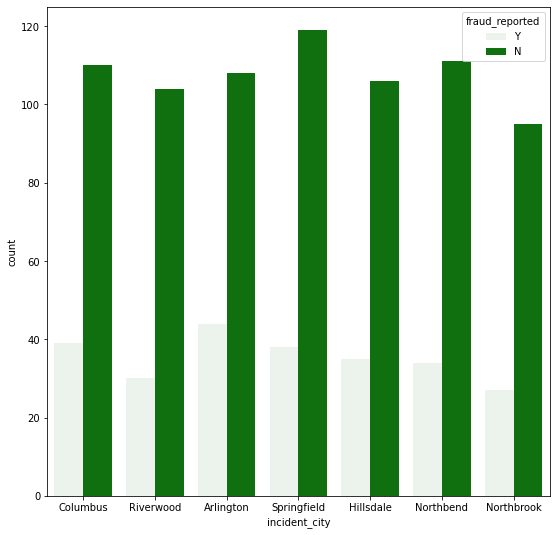

In [136]:
plt.figure(figsize=(9,9))
sns.countplot(x = 'incident_city',hue='fraud_reported',data=df,color='g')

##### From above plot we can see that most of the incidents are happened in Springfield city and the Fraud report registered more from city Arlington.

<AxesSubplot:xlabel='number_of_vehicles_involved', ylabel='count'>

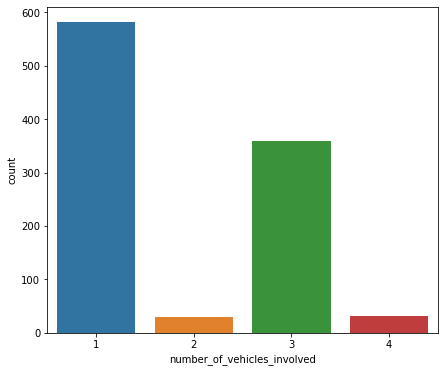

In [137]:
plt.figure(figsize=(7,6))
sns.countplot(x = 'number_of_vehicles_involved',data=df)

##### More accidentes are happened due to the single vehicle.

<AxesSubplot:xlabel='property_damage', ylabel='count'>

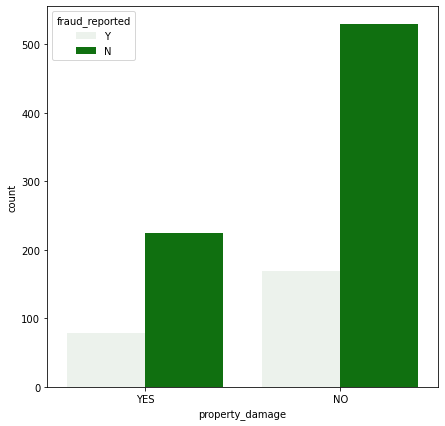

In [138]:
plt.figure(figsize=(7,7))
sns.countplot(x = 'property_damage',hue='fraud_reported',data=df,color='g')

##### Number of property damaged is less.

<AxesSubplot:xlabel='police_report_available', ylabel='count'>

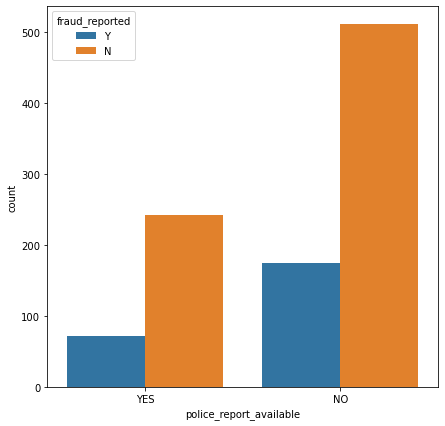

In [139]:
plt.figure(figsize=(7,7))
sns.countplot(x = 'police_report_available',hue='fraud_reported',data=df)

##### Less number of police report available of accidents but the number of fraud report is more when there is no police report.

### Description

In [140]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.979598e+06,501214.488000,37890.15880,-39520.707500,1.83900,0.992000,1.487000,52761.94000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,1.880709e+06,71701.610941,17109.71994,16922.069199,1.01888,0.820127,1.111335,26401.53319,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,800.00000,-111100.000000,1.00000,0.000000,0.000000,100.00000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,1.101000e+06,448404.500000,25126.10000,-51500.000000,1.00000,0.000000,1.000000,41812.50000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,1.101000e+06,466445.500000,25126.10000,-26793.700000,1.00000,1.000000,1.000000,58055.00000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,1.101000e+06,603251.000000,51025.00000,-26793.700000,3.00000,2.000000,2.000000,70592.50000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.00000,-5700.000000,4.00000,2.000000,3.000000,114920.00000,2015.000000


##### The description of dataset shows the Count,Standard Deviation,Mean,Maximum value and Minimum value of each column.

<AxesSubplot:>

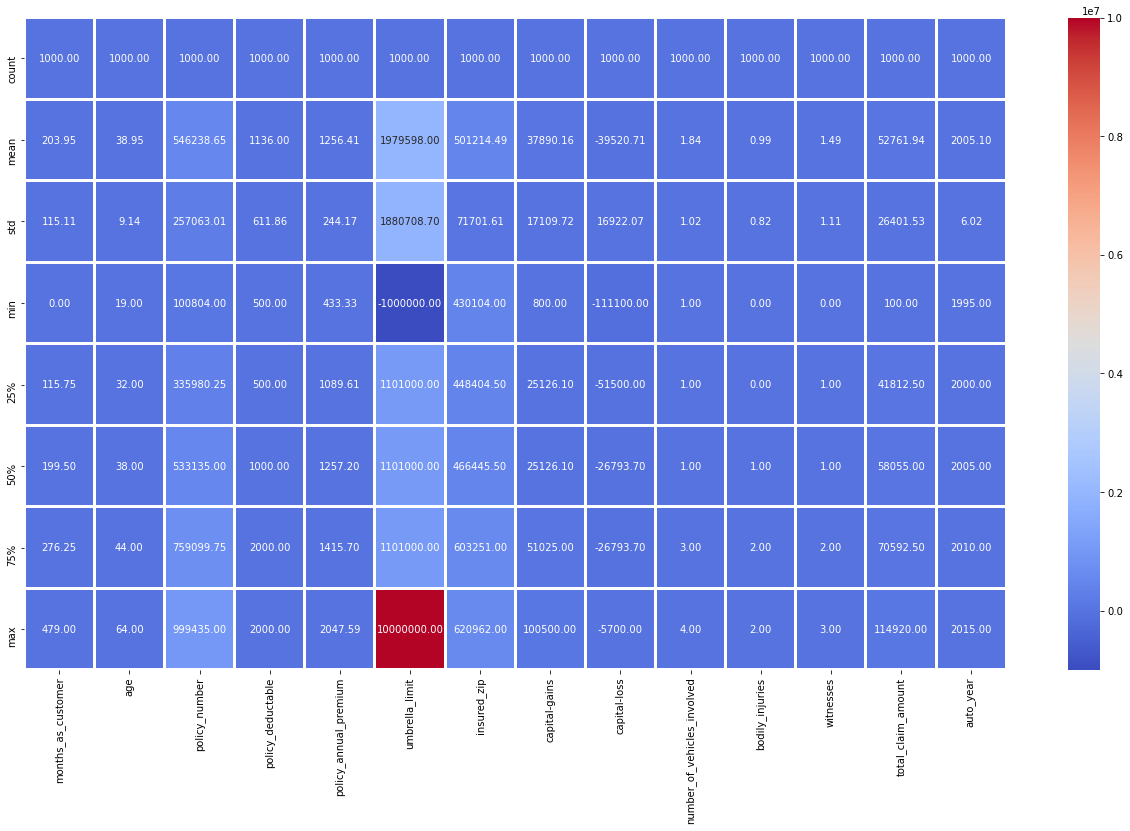

In [141]:
plt.figure(figsize=(22,12))
sns.heatmap(df.describe(),annot=True,fmt='.2f',linewidths=2,cmap='coolwarm')

### Outcome of Description
##### Description of INSURANCE daraset helps us to clean the data.

months_as_customer - 1.Mean = 38.58, 2.Std = 13.64, 3.Min = 17, Max = 90

age - 1.Mean = 189781.81, 2.Std = 105549.76, 3.Min = 12285, Max = 1484705

policy_number - 1.Mean = 10.08, 2.Std = 2.57, 3.Min = 1, Max = 16

policy_deductable- 1.Mean = 2065.51, 2.Std = 7245.94, 3.Min = 114, Max = 99999

policy_annual_premium - 1.Mean = 170.54, 2.Std = 384.95, 3.Min = 87.31, Max = 4356

umbrella_limit	 - 1.Mean = 40.44, 2.Std = 12.35, 3.Min = 1, Max = 99

insured_zip - 1.Mean = 38.58, 2.Std = 13.64, 3.Min = 17, Max = 90

capital-gains - 1.Mean = 189781.81, 2.Std = 105549.76, 3.Min = 12285, Max = 1484705

capital-loss - 1.Mean = 10.08, 2.Std = 2.57, 3.Min = 1, Max = 16

number_of_vehicles_involved - 1.Mean = 2065.51, 2.Std = 7245.94, 3.Min = 114, Max = 99999

bodily_injuries	 - 1.Mean = 170.54, 2.Std = 384.95, 3.Min = 87.31, Max = 4356

witnesses - 1.Mean = 40.44, 2.Std = 12.35, 3.Min = 1, Max = 99

total_claim_amount - 1.Mean = 40.44, 2.Std = 12.35, 3.Min = 1, Max = 99	

auto_year - 1.Mean = 40.44, 2.Std = 12.35, 3.Min = 1, Max = 99

### Correlation

In [142]:
df.corr()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,auto_year
months_as_customer,1.000000,0.922098,0.057555,0.026807,0.005018,0.017658,0.017895,0.003087,0.023170,0.014736,-0.010162,0.058383,0.062108,-0.000292
age,0.922098,1.000000,0.059413,0.029188,0.014404,0.022174,0.025604,-0.010011,0.013676,0.022102,-0.015679,0.052359,0.069863,0.001354
policy_number,0.057555,0.059413,1.000000,-0.006738,0.022566,0.011344,0.007083,0.004832,-0.007750,0.013432,-0.004558,-0.012661,-0.018009,-0.000183
policy_deductable,0.026807,0.029188,-0.006738,1.000000,-0.003245,0.014209,0.004545,0.027118,-0.009054,0.051214,-0.022765,0.066639,0.022839,0.026105
policy_annual_premium,0.005018,0.014404,0.022566,-0.003245,1.000000,-0.007658,0.032354,0.003272,0.036526,-0.045991,0.026780,0.002332,0.009094,-0.049226
umbrella_limit,0.017658,0.022174,0.011344,0.014209,-0.007658,1.000000,0.022914,-0.049139,-0.016917,-0.018806,0.016623,-0.005398,-0.041842,0.011482
insured_zip,0.017895,0.025604,0.007083,0.004545,0.032354,0.022914,1.000000,-0.000069,0.031951,0.027448,0.028695,0.019805,-0.033873,-0.032736
capital-gains,0.003087,-0.010011,0.004832,0.027118,0.003272,-0.049139,-0.000069,1.000000,-0.044713,0.058272,0.046252,-0.014728,0.010464,0.035186
capital-loss,0.023170,0.013676,-0.007750,-0.009054,0.036526,-0.016917,0.031951,-0.044713,1.000000,-0.030143,-0.020841,-0.052489,-0.051201,-0.041617
number_of_vehicles_involved,0.014736,0.022102,0.013432,0.051214,-0.045991,-0.018806,0.027448,0.058272,-0.030143,1.000000,0.014030,-0.014669,0.274278,0.034554


<AxesSubplot:>

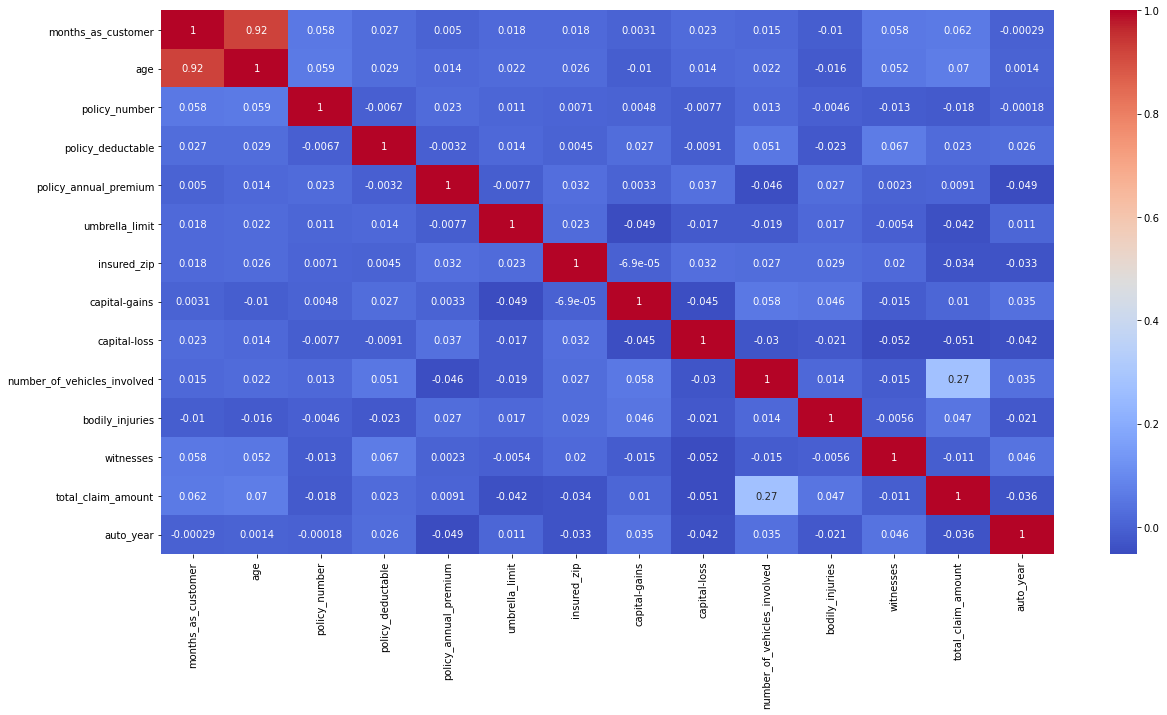

In [143]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

##### From above plot we can seen that most of the columns are positively correlated with each other. Number_of_vehicles_involved and total_claim_amount are 27 percent correlated with each other which consider to be good bond.

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_state                 1000 non-null   object 
 4   policy_deductable            1000 non-null   int64  
 5   policy_annual_premium        1000 non-null   float64
 6   umbrella_limit               1000 non-null   int64  
 7   insured_zip                  1000 non-null   int64  
 8   insured_sex                  1000 non-null   object 
 9   insured_education_level      1000 non-null   object 
 10  insured_occupation           1000 non-null   object 
 11  capital-gains                1000 non-null   float64
 12  capital-loss                 1000 non-null   float64
 13  incident_type      

##### There is no null values in Insurance dataset.

In [145]:
non_cat_columns = []
for i in df.dtypes.index:
    if df[i].dtypes != object:
        non_cat_columns.append(i)
non_cat_columns

['months_as_customer',
 'age',
 'policy_number',
 'policy_deductable',
 'policy_annual_premium',
 'umbrella_limit',
 'insured_zip',
 'capital-gains',
 'capital-loss',
 'number_of_vehicles_involved',
 'bodily_injuries',
 'witnesses',
 'total_claim_amount',
 'auto_year']

In [146]:
cat_col = []
for i in df.dtypes.index:
    if df[i].dtypes == object:
        cat_col.append(i)
cat_col

['policy_state',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_city',
 'property_damage',
 'police_report_available',
 'auto_make',
 'fraud_reported']

### Data Cleaning

#### Skewness

In [147]:
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.947376
insured_zip                    0.816554
capital-gains                  1.024783
capital-loss                  -0.996968
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
auto_year                     -0.048289
dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

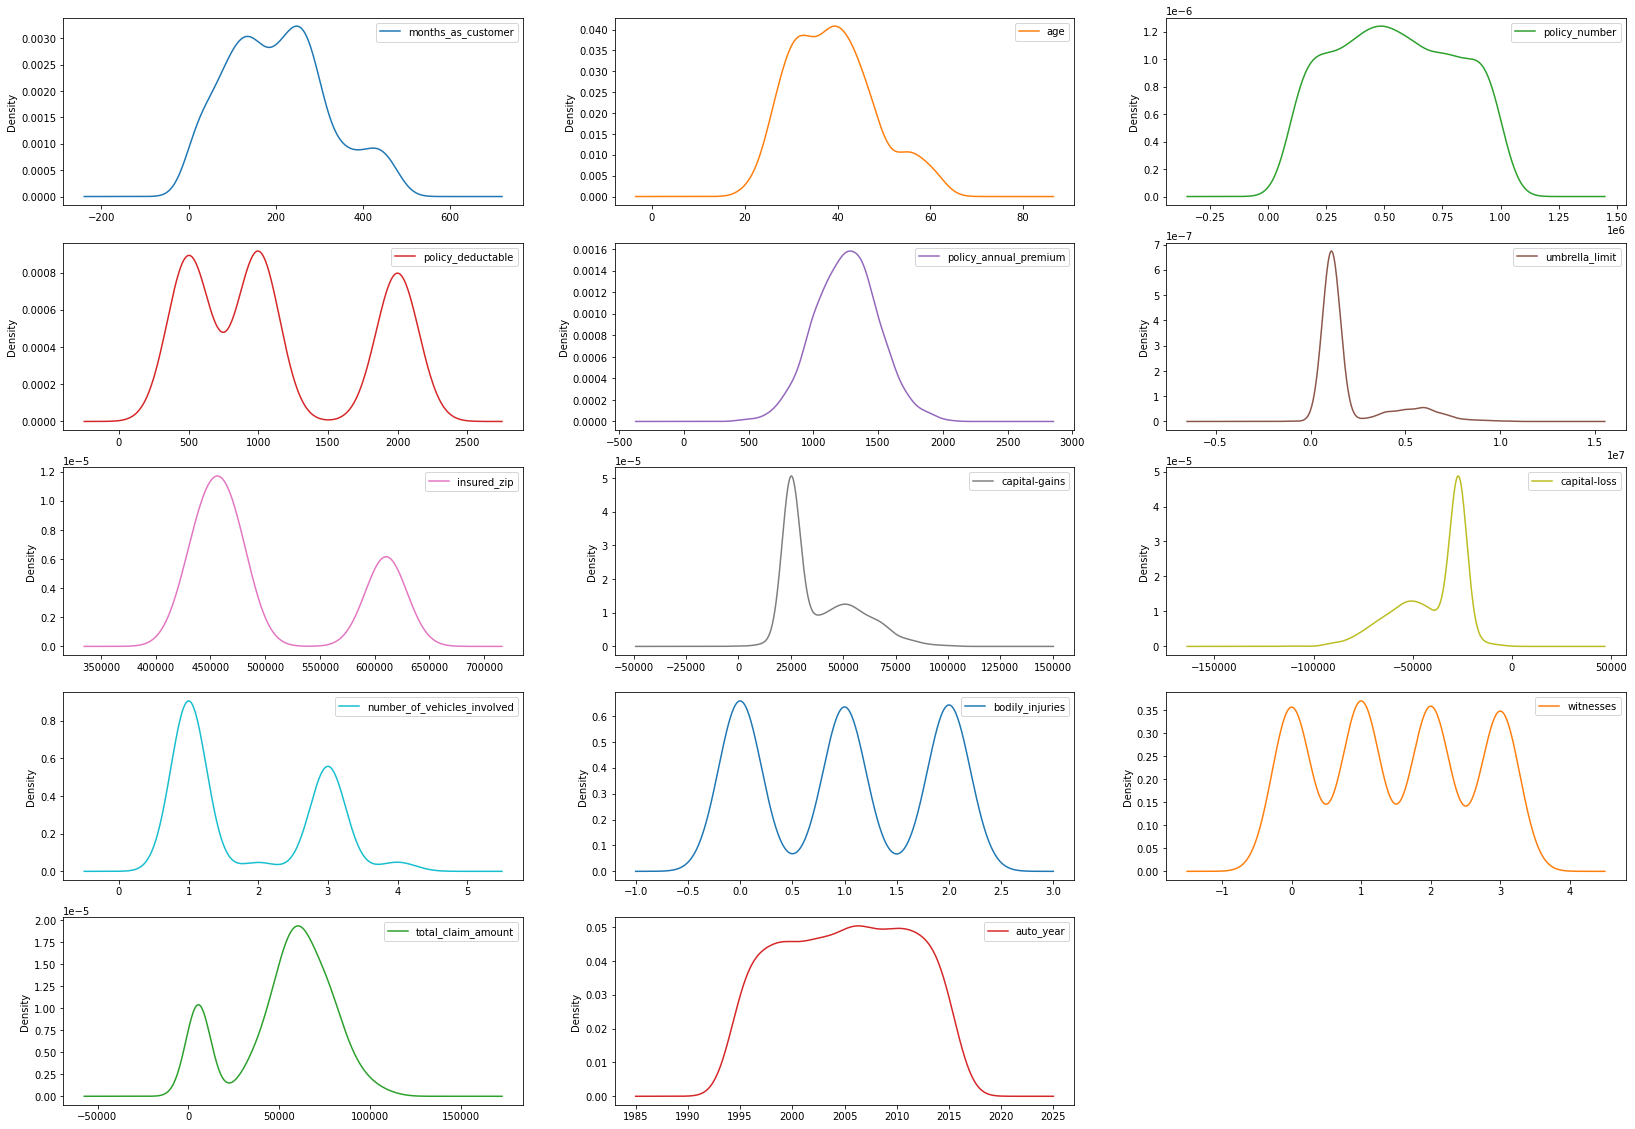

In [148]:
df.plot(kind = 'density',subplots = True,layout = (5,3),figsize=(28,20),sharex = False)
plt.show

##### We can see the skewness in data for multiple column.

In [149]:
df.skew().sort_values(ascending = False)

umbrella_limit                 1.947376
capital-gains                  1.024783
insured_zip                    0.816554
number_of_vehicles_involved    0.502664
age                            0.478988
policy_deductable              0.477887
months_as_customer             0.362177
policy_number                  0.038991
witnesses                      0.019636
bodily_injuries                0.014777
policy_annual_premium          0.004402
auto_year                     -0.048289
total_claim_amount            -0.594582
capital-loss                  -0.996968
dtype: float64

### Data Conversoin

In [150]:
from sklearn.preprocessing import LabelEncoder
lec = LabelEncoder()

In [151]:
for i in df.columns:
    if df [i].dtypes == object:
        df[i] = lec.fit_transform(df[i].values.reshape(-1,1))

In [152]:
df

,months_as_customer,age,policy_number,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_city,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,auto_make,auto_year,fraud_reported
0,328,48,521585,2,1000,1406.91,1101000,466132,1,4,2,53300.0,-26793.7,2,2,0,4,1,1,1,1,2,1,71610,10,2004,1
1,228,42,342868,1,2000,1197.22,5000000,468176,1,4,6,25126.1,-26793.7,3,1,1,4,5,1,0,0,0,0,5070,8,2007,1
2,134,29,687698,2,2000,1413.14,5000000,430632,0,6,11,35100.0,-26793.7,0,1,1,4,1,3,0,2,3,0,34650,4,2007,0
3,256,41,227811,0,2000,1415.74,6000000,608117,0,6,1,48900.0,-62400.0,2,0,0,4,0,1,0,1,2,0,63400,3,2014,1
4,228,44,367455,0,1000,1583.91,6000000,610706,1,0,11,66000.0,-46000.0,3,1,1,2,0,1,0,0,1,0,6500,0,2009,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,2,1000,1310.80,1101000,431289,0,5,2,25126.1,-26793.7,2,0,1,1,4,1,1,0,1,0,87200,6,2006,0
996,285,41,186934,0,1000,1436.79,1101000,608177,0,6,9,70900.0,-26793.7,2,1,0,1,3,1,1,2,3,0,108480,13,2015,0
997,130,34,918516,2,500,1383.49,3000000,442797,0,5,1,35100.0,-26793.7,0,2,1,4,0,3,0,2,3,1,67500,11,1996,0
998,458,62,533940,0,2000,1356.92,5000000,441714,1,0,5,25126.1,-26793.7,2,1,0,3,0,1,0,0,1,1,46980,1,1998,0


### Checking Outliers

In [153]:
df_non_cat_columns = df[non_cat_columns]
df_non_cat_columns

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,auto_year
0,328,48,521585,1000,1406.91,1101000,466132,53300.0,-26793.7,1,1,2,71610,2004
1,228,42,342868,2000,1197.22,5000000,468176,25126.1,-26793.7,1,0,0,5070,2007
2,134,29,687698,2000,1413.14,5000000,430632,35100.0,-26793.7,3,2,3,34650,2007
3,256,41,227811,2000,1415.74,6000000,608117,48900.0,-62400.0,1,1,2,63400,2014
4,228,44,367455,1000,1583.91,6000000,610706,66000.0,-46000.0,1,0,1,6500,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1000,1310.80,1101000,431289,25126.1,-26793.7,1,0,1,87200,2006
996,285,41,186934,1000,1436.79,1101000,608177,70900.0,-26793.7,1,2,3,108480,2015
997,130,34,918516,500,1383.49,3000000,442797,35100.0,-26793.7,3,2,3,67500,1996
998,458,62,533940,2000,1356.92,5000000,441714,25126.1,-26793.7,1,0,1,46980,1998


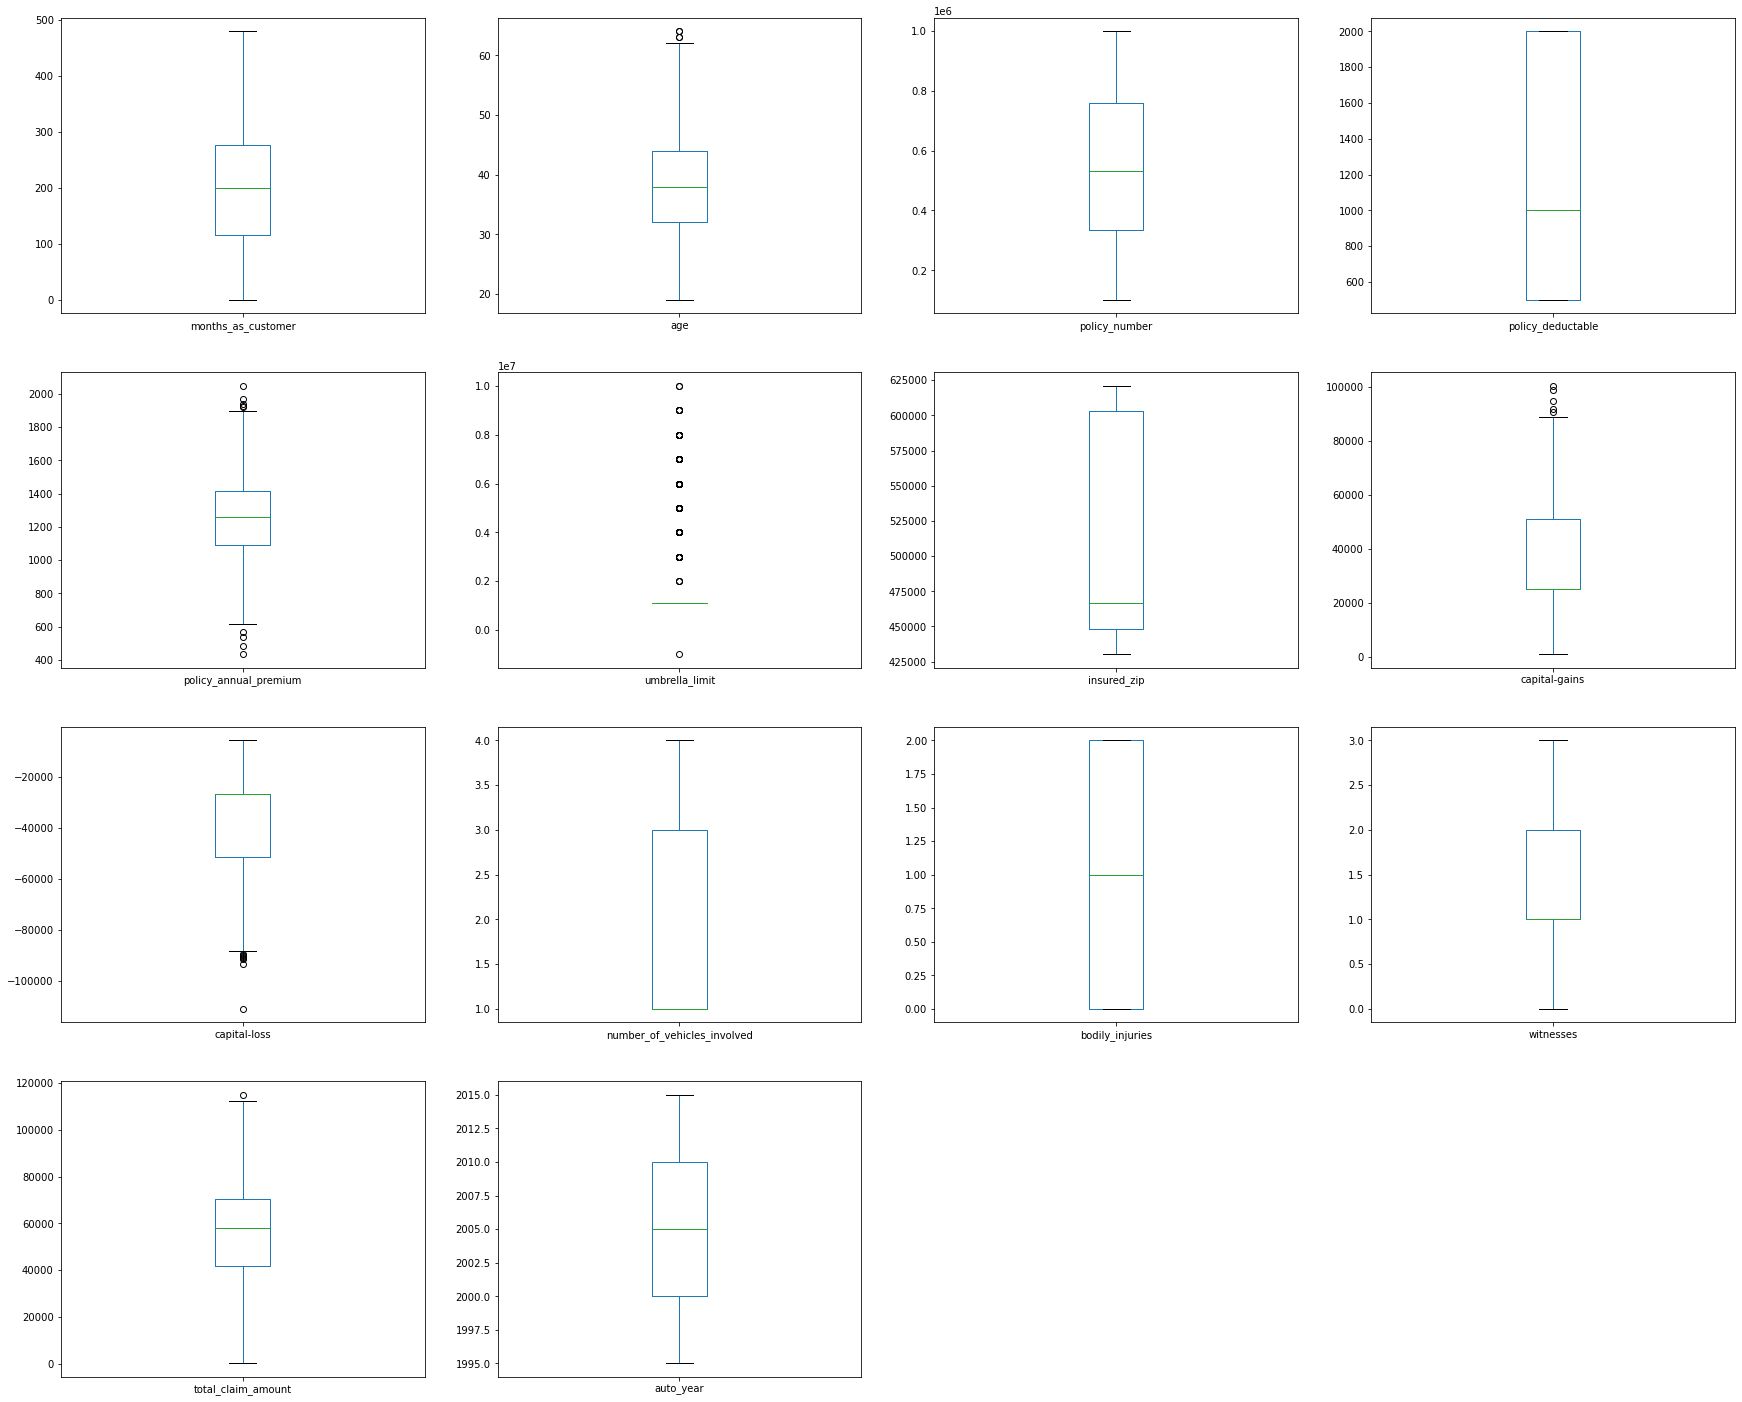

In [154]:
df_non_cat_columns.plot(kind = 'box',subplots=True,layout=(4,4),figsize=(30,25))
plt.show()

##### We can see Outliers present in,

Age

Policy_annual_premium

Umbrella_limit

Capital_gains

Capital_loss

Total_claim_amount

### Removing Outliers

#### Z Score Technique

In [155]:
from scipy.stats import zscore

z = np.abs(zscore(df))
z.shape

(1000, 27)

In [156]:
df = df[(z<3).all(axis=1)]
df.shape

(972, 27)

### Percentage Data Loss

In [157]:
percetage_data_loss = (1000-972)/1000*100
percetage_data_loss

2.8000000000000003

### VIF

In [158]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [159]:
def calculate_vif(dataset):
    vif = pd.DataFrame()
    vif['Features'] = dataset.columns
    vif['VIF_values'] = [variance_inflation_factor(dataset.values,i) for i in range(dataset.shape[1])]
    return(vif.sort_values(by = 'VIF_values',ascending = False))

In [160]:
calculate_vif(df_non_cat_columns)

,Features,VIF_values
13,auto_year,143.197120
1,age,128.695210
6,insured_zip,50.201222
0,months_as_customer,27.770232
4,policy_annual_premium,27.660906
8,capital-loss,6.542600
7,capital-gains,5.983584
2,policy_number,5.550441
12,total_claim_amount,5.477425
9,number_of_vehicles_involved,4.657984


In [161]:
df.drop(['auto_year','age','insured_zip','months_as_customer','policy_annual_premium'],axis=1,inplace=True)

##### We drop the columns because VIF for these columns are too high and VIF for other  the other columns are within the threshold

In [162]:
df

,policy_number,policy_state,policy_deductable,umbrella_limit,insured_sex,insured_education_level,insured_occupation,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_city,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,auto_make,fraud_reported
0,521585,2,1000,1101000,1,4,2,53300.0,-26793.7,2,2,0,4,1,1,1,1,2,1,71610,10,1
1,342868,1,2000,5000000,1,4,6,25126.1,-26793.7,3,1,1,4,5,1,0,0,0,0,5070,8,1
2,687698,2,2000,5000000,0,6,11,35100.0,-26793.7,0,1,1,4,1,3,0,2,3,0,34650,4,0
3,227811,0,2000,6000000,0,6,1,48900.0,-62400.0,2,0,0,4,0,1,0,1,2,0,63400,3,1
4,367455,0,1000,6000000,1,0,11,66000.0,-46000.0,3,1,1,2,0,1,0,0,1,0,6500,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,941851,2,1000,1101000,0,5,2,25126.1,-26793.7,2,0,1,1,4,1,1,0,1,0,87200,6,0
996,186934,0,1000,1101000,0,6,9,70900.0,-26793.7,2,1,0,1,3,1,1,2,3,0,108480,13,0
997,918516,2,500,3000000,0,5,1,35100.0,-26793.7,0,2,1,4,0,3,0,2,3,1,67500,11,0
998,533940,0,2000,5000000,1,0,5,25126.1,-26793.7,2,1,0,3,0,1,0,0,1,1,46980,1,0


### Splitting the Dataframe in dfx and dfy

In [163]:
dfx = df.drop('fraud_reported',axis=1)
dfx.shape

(972, 21)

In [164]:
dfy = df['fraud_reported']
dfy.shape

(972,)

#### Checking if dataset is balanced.

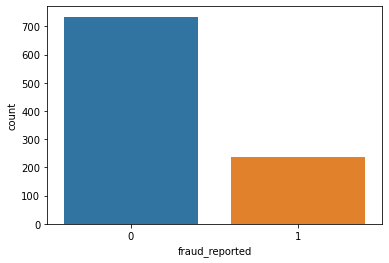

In [165]:
sns.countplot(dfy)
plt.show()

##### Above plot shows that data is imbalanced,so we have to balanced the data.

### Balancing the Dataset

In [166]:
from imblearn.over_sampling import SMOTE

In [167]:
sm = SMOTE()
x,y = sm.fit_resample(dfx,dfy)

In [168]:
x.shape

(1468, 21)

(1468,)
0    734
1    734
Name: fraud_reported, dtype: int64



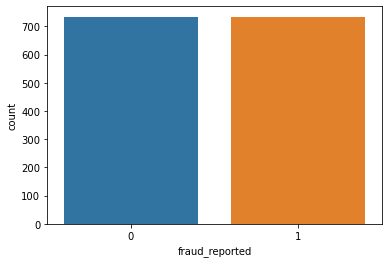

In [169]:
print(y.shape)
print(y.value_counts())
print()
sns.countplot(y)
plt.show()

##### Data is balanced Now.

### Normalizing Using Power Transform

In [170]:
from sklearn.preprocessing import power_transform

x1 = power_transform(x)

In [171]:
type(x1)

numpy.ndarray

In [172]:
x = pd.DataFrame(x1,columns=x.columns)
x

,policy_number,policy_state,policy_deductable,umbrella_limit,insured_sex,insured_education_level,insured_occupation,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_city,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,auto_make
0,-0.006445,1.263916,-0.037923,-0.442777,1.273353,0.672993,-1.169618,1.115720,0.809626,0.992475,1.422715,-1.040078,1.280730,-0.907680,-0.866667,1.824934,0.246990,0.627177,1.764099,0.676939,0.946535
1,-0.737430,0.229116,1.295354,1.859865,1.273353,0.672993,-0.031328,-0.744814,0.809626,1.517441,0.205487,0.489617,1.280730,1.106989,-0.866667,-0.547965,-1.227380,-1.413783,-0.566862,-1.974110,0.488696
2,0.607777,1.263916,1.295354,1.859865,-0.785328,1.602143,1.160422,0.084579,0.809626,-1.071569,0.205487,0.489617,1.280730,-0.907680,1.248499,-0.547965,1.294963,1.421585,-0.566862,-0.985900,-0.533413
3,-1.269500,-1.221636,1.295354,2.418580,-0.785328,1.602143,-1.509668,0.903523,-1.415937,0.992475,-1.331863,-1.040078,1.280730,-1.633306,-0.866667,-0.547965,0.246990,0.627177,-0.566862,0.279937,-0.823198
4,-0.631134,-1.221636,-0.037923,2.418580,1.273353,-1.667994,1.160422,1.641007,-0.668000,1.517441,0.205487,0.489617,0.134237,-1.633306,-0.866667,-0.547965,-1.227380,-0.284712,-0.566862,-1.939718,-1.884121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1463,-0.913295,-1.221636,0.259553,-0.442777,1.273353,0.168786,0.934828,0.774085,-1.579416,-1.071569,0.205487,0.489617,-1.430003,-0.907680,0.646162,-0.547965,-1.227380,0.627177,-0.566862,0.027770,-0.260360
1464,0.257775,-1.221636,1.165075,2.418580,-0.785328,0.672993,-0.031328,1.325063,0.448987,-1.071569,0.205487,-1.040078,0.737793,-1.633306,1.248499,-0.547965,0.246990,-1.413783,-0.566862,0.167665,-0.533413
1465,-1.205269,-1.221636,0.457001,-0.442777,-0.785328,0.168786,-0.031328,-0.040406,0.809626,-1.071569,0.205487,0.489617,-0.561831,0.202222,0.646162,-0.547965,0.246990,-0.284712,-0.566862,1.843749,-0.260360
1466,-1.929950,0.229116,-0.961319,-0.442777,-0.785328,1.602143,1.381037,-0.744814,0.809626,0.241744,0.205487,-1.040078,-0.561831,-0.907680,-0.866667,-0.547965,-1.227380,-1.413783,-0.566862,0.552364,0.946535


In [173]:
x.skew()

policy_number                 -0.147203
policy_state                  -0.082454
policy_deductable             -0.018796
umbrella_limit                 1.625021
insured_sex                    0.488525
insured_education_level       -0.155463
insured_occupation            -0.190832
capital-gains                 -0.008178
capital-loss                   0.023412
incident_type                  0.013048
collision_type                -0.093126
incident_severity              0.114267
authorities_contacted         -0.168427
incident_city                 -0.146638
number_of_vehicles_involved    0.344315
property_damage                1.278275
bodily_injuries               -0.078076
witnesses                     -0.127825
police_report_available        1.198462
total_claim_amount            -0.448700
auto_make                     -0.189680
dtype: float64

In [174]:
i = ['policy_deductable','umbrella_limit','property_damage','police_report_available']
x.drop(i,axis=1,inplace=True)

##### We drop the coumns : Policy deductable,umbrella limit, property damaged and police report available because it has skewness after using power transform.

### Scaling the Model

In [175]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(x)
X = pd.DataFrame(X,columns=x.columns)
X

,policy_number,policy_state,insured_sex,insured_education_level,insured_occupation,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_city,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,auto_make
0,-0.006445,1.263916,1.273353,0.672993,-1.169618,1.115720,0.809626,0.992475,1.422715,-1.040078,1.280730,-0.907680,-0.866667,0.246990,0.627177,0.676939,0.946535
1,-0.737430,0.229116,1.273353,0.672993,-0.031328,-0.744814,0.809626,1.517441,0.205487,0.489617,1.280730,1.106989,-0.866667,-1.227380,-1.413783,-1.974110,0.488696
2,0.607777,1.263916,-0.785328,1.602143,1.160422,0.084579,0.809626,-1.071569,0.205487,0.489617,1.280730,-0.907680,1.248499,1.294963,1.421585,-0.985900,-0.533413
3,-1.269500,-1.221636,-0.785328,1.602143,-1.509668,0.903523,-1.415937,0.992475,-1.331863,-1.040078,1.280730,-1.633306,-0.866667,0.246990,0.627177,0.279937,-0.823198
4,-0.631134,-1.221636,1.273353,-1.667994,1.160422,1.641007,-0.668000,1.517441,0.205487,0.489617,0.134237,-1.633306,-0.866667,-1.227380,-0.284712,-1.939718,-1.884121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1463,-0.913295,-1.221636,1.273353,0.168786,0.934828,0.774085,-1.579416,-1.071569,0.205487,0.489617,-1.430003,-0.907680,0.646162,-1.227380,0.627177,0.027770,-0.260360
1464,0.257775,-1.221636,-0.785328,0.672993,-0.031328,1.325063,0.448987,-1.071569,0.205487,-1.040078,0.737793,-1.633306,1.248499,0.246990,-1.413783,0.167665,-0.533413
1465,-1.205269,-1.221636,-0.785328,0.168786,-0.031328,-0.040406,0.809626,-1.071569,0.205487,0.489617,-0.561831,0.202222,0.646162,0.246990,-0.284712,1.843749,-0.260360
1466,-1.929950,0.229116,-0.785328,1.602143,1.381037,-0.744814,0.809626,0.241744,0.205487,-1.040078,-0.561831,-0.907680,-0.866667,-1.227380,-1.413783,0.552364,0.946535


### Training the Model

In [176]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

### Best Random State

In [177]:
lr = LogisticRegression()
lr

LogisticRegression()

In [178]:
maxAccu = 0
maxRs = 0

for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.25,random_state=i)
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRs=i
print('Best Accuracy is',maxAccu,'for random state',maxRs)

Best Accuracy is 0.8773841961852861 for random state 86


In [179]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.25,random_state=86)

In [180]:
x_train.shape

(1101, 17)

In [181]:
x_test.shape

(367, 17)

In [182]:
y_train.shape

(1101,)

In [183]:
y_test.shape

(367,)

### Model Testing

In [227]:
def Model(model):
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    print('Accuracy',accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    scr1 = cross_val_score(model,x,y,cv = 8)
    print('Cross validation score :',scr1.mean())

### Logistic Regression

In [228]:
lr = LogisticRegression()
Model(lr)

Accuracy 0.8773841961852861
[[164  20]
 [ 25 158]]
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       184
           1       0.89      0.86      0.88       183

    accuracy                           0.88       367
   macro avg       0.88      0.88      0.88       367
weighted avg       0.88      0.88      0.88       367

Cross validation score : 0.8216767640769779


### Random Forest Classifier

In [229]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
Model(rf)

Accuracy 0.885558583106267
[[166  18]
 [ 24 159]]
              precision    recall  f1-score   support

           0       0.87      0.90      0.89       184
           1       0.90      0.87      0.88       183

    accuracy                           0.89       367
   macro avg       0.89      0.89      0.89       367
weighted avg       0.89      0.89      0.89       367

Cross validation score : 0.8516683000712758


### Service Vector Classifier

In [230]:
from sklearn.svm import SVC

svm = SVC()
Model(svm)

Accuracy 0.8828337874659401
[[165  19]
 [ 24 159]]
              precision    recall  f1-score   support

           0       0.87      0.90      0.88       184
           1       0.89      0.87      0.88       183

    accuracy                           0.88       367
   macro avg       0.88      0.88      0.88       367
weighted avg       0.88      0.88      0.88       367

Cross validation score : 0.8448488358279876


### AdaBoost Classifier

In [231]:
from sklearn.ensemble import AdaBoostClassifier

adb = AdaBoostClassifier()
Model(adb)

Accuracy 0.8637602179836512
[[160  24]
 [ 26 157]]
              precision    recall  f1-score   support

           0       0.86      0.87      0.86       184
           1       0.87      0.86      0.86       183

    accuracy                           0.86       367
   macro avg       0.86      0.86      0.86       367
weighted avg       0.86      0.86      0.86       367

Cross validation score : 0.8237816286528867


### KNeighbours Classifier

In [232]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
Model(kn)

Accuracy 0.7983651226158038
[[125  59]
 [ 15 168]]
              precision    recall  f1-score   support

           0       0.89      0.68      0.77       184
           1       0.74      0.92      0.82       183

    accuracy                           0.80       367
   macro avg       0.82      0.80      0.80       367
weighted avg       0.82      0.80      0.80       367

Cross validation score : 0.7977473865526252


### Decision Tree Classifier

In [233]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
Model(dtc)

Accuracy 0.784741144414169
[[135  49]
 [ 30 153]]
              precision    recall  f1-score   support

           0       0.82      0.73      0.77       184
           1       0.76      0.84      0.79       183

    accuracy                           0.78       367
   macro avg       0.79      0.78      0.78       367
weighted avg       0.79      0.78      0.78       367

Cross validation score : 0.7501225053456879


### Gradient Boosting Classifier

In [235]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
Model(gbc)

Accuracy 0.8801089918256131
[[164  20]
 [ 24 159]]
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       184
           1       0.89      0.87      0.88       183

    accuracy                           0.88       367
   macro avg       0.88      0.88      0.88       367
weighted avg       0.88      0.88      0.88       367

Cross validation score : 0.8421611427892611


##### By testing all the Models we can see that Accuracy for Random Forest Classifier is highest than other models but the difference between Accuracy score and Cross validation score is more.
##### So we choose KNeighbour Claasifier as our final model, because difference of Accuracy and Cross Validation is less than the other models.

### Hyper Parameter Tuning

In [236]:
KNeighborsClassifier()

KNeighborsClassifier()

In [237]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_neighbors' : np.arange(1,20,2),
             'weights' : ['uniform', 'distance'],
             'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
             'leaf_size' : np.arange(5,50,5)}

In [238]:
GCV = GridSearchCV(KNeighborsClassifier(),parameters,cv=8,scoring='accuracy')
GCV.fit(x_train,y_train)
GCV.best_params_

{'algorithm': 'auto', 'leaf_size': 5, 'n_neighbors': 1, 'weights': 'uniform'}

In [239]:
GCV_pred = GCV.best_estimator_.predict(x_test)
accuracy_score(y_test,GCV_pred)

0.8119891008174387

##### After doing Hyper Parameter tuning Accuracy score for KNeighbours Classifier is increased so we choose KNeighbours Classifier as a final Model.

### ROC AUC Plot

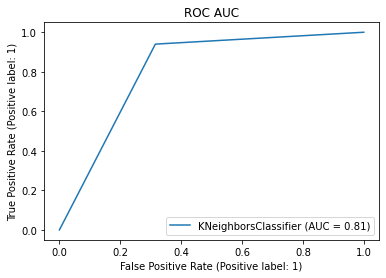

In [240]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(GCV.best_estimator_,x_test,y_test)
plt.title('ROC AUC')
plt.show()